Regresi Sederhana


In [8]:

import pandas as pd

#Membuat data frame untuk membaca data
df = pd.read_csv('../data/day.csv', sep=',')
df.head() # mengambil 5 baris data dari atas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Praproses Data

In [10]:
# Data Preprocessing untuk dataset Bike Sharing
# Hapus kolom yang tidak relevan untuk prediksi
df1 = df.drop(columns=['instant', 'dteday', 'casual', 'registered']).copy()

# Cek apakah ada nilai kosong
print(df1.isnull().sum())

# Tampilkan 5 baris pertama
df1.head()


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Analisis Korelasi

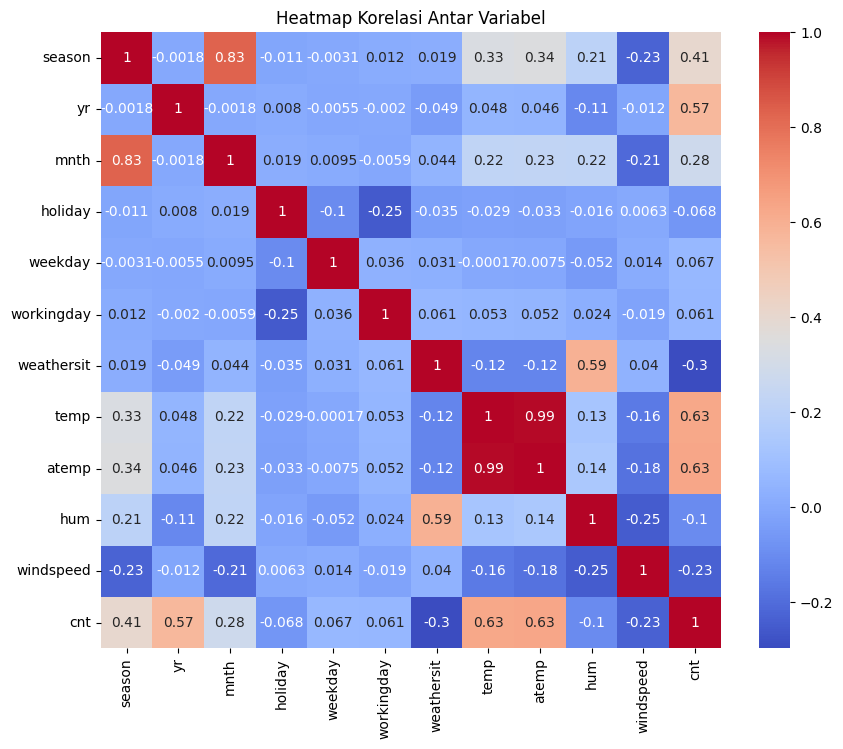

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Membuat heatmap korelasi antar variabel
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


Menentukan Variabel X dan Y

In [22]:
# Variabel independen (X) dan dependen (y)
X = df1[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
          'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df1['cnt']

y.head()
X.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


Split Data Training dan Testing

In [17]:
from sklearn.model_selection import train_test_split

# Membagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))


Jumlah data training: 584
Jumlah data testing : 147


Membuat Model Regresi Linear

In [18]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluasi Model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi data testing
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 617.3930656443378
Mean Squared Error (MSE): 691035.0082022649
R² Score: 0.8276670090367213


Persamaan Regresi

In [20]:
# Menampilkan nilai intercept dan koefisien tiap variabel
print("Intercept:", model.intercept_)

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df


Intercept: 1248.3209284778209


,Coefficient
season,524.722536
yr,2023.997547
mnth,-38.444658
holiday,-391.550766
weekday,72.937003
workingday,160.804892
weathersit,-632.856284
temp,2097.247836
atemp,3488.042179
hum,-865.439419


Visualisasi Prediksi vs Aktual

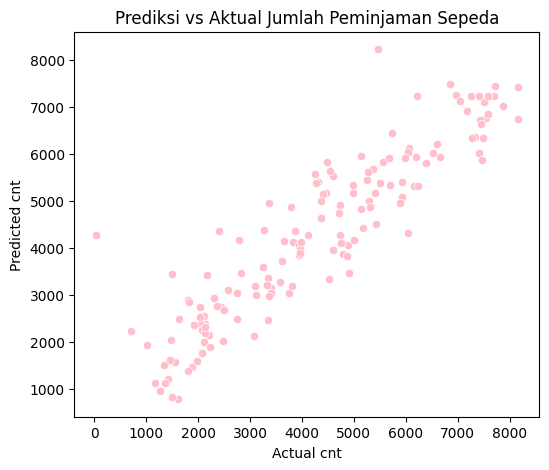

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color='pink')
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.title("Prediksi vs Aktual Jumlah Peminjaman Sepeda")
plt.show()

Perbandingan Actual & Predict


In [ ]:
compare_df = pd.DataFrame({'actual': y_test.values, 'predicted': y_pred}) 
compare_df = compare_df.reset_index(drop=True)                            
compare_df.head(20)                                                        


,actual,predicted
0,6606,6220.416612
1,1550,1571.605763
2,3747,3043.967028
3,6041,4307.202484
4,7538,6765.659072
5,7264,7231.536106
6,1605,774.904147
7,2209,2139.606601
8,7499,7112.745605
9,5743,6458.992169


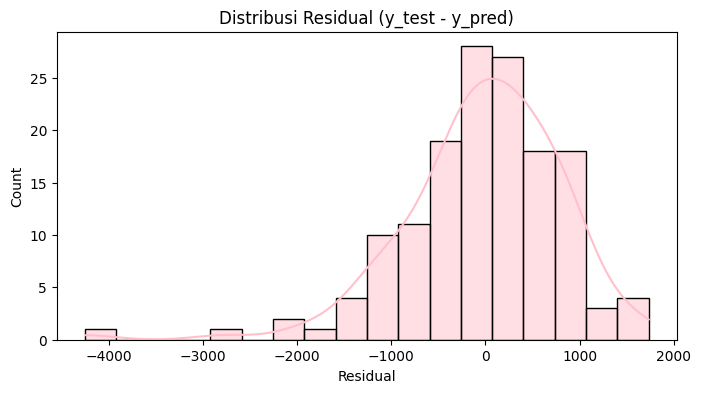

In [26]:
residuals = y_test.values - y_pred                    
plt.figure(figsize=(8,4))                             
sns.histplot(residuals, kde=True, color='pink')                     
plt.title("Distribusi Residual (y_test - y_pred)")    
plt.xlabel("Residual")                                
plt.show()                                            
